# Multilayer perceptron (MLP)

CIFAR-10 데이터 준비 및 전처리

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets

## 0. Parameters <a name="parameters"></a>

In [2]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [3]:
# CIFAR-10 dataset load
# # x_train, x_test는 각각 [50000,32,32,3], [10000,32,32,3] 크기의 np배열로 각 이미지 클래스에 대해 0~9 범위 정수 레이블로 설정
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [4]:
# pixel 채널 값이 0과 1사이가 되도록 이미지 스케일 조정
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 레이블 원-핫 인코딩. y_train, y_test 크기를 각 [50000,10], [10000,10]으로 조정
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [5]:
display(x_train[:10])
print(y_train[:10])

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## 2. Build the model <a name="build"></a>

In [8]:
# model = models.Sequential([
#     layers.Flatten(input_shape=(32,32,3)),
#     layers.Dense(200, activation = 'relu'),
#     layers.Dense(150, activation = 'relu'),
#     layers.Dense(10, activation = 'relu'),
# ])

In [9]:
# 함수형 API를 사용해 동일한 MLP 생성.
# 이러한 모델을 구성할 때에는 Sequential 클래스보다는 유연한 함수형 API를 사용하는것이 좋음.
# 신경망의 구조가 복잡해짐에 따라 장기적으로 나은 선택이 된다. 함수형 API를 사용하면 심층 신경망의 설계를 자유롭게 할 수 있음.
input_layer = layers.Input((32, 32, 3))

x = layers.Flatten()(input_layer)
x = layers.Dense(200, activation="relu")(x)
x = layers.Dense(150, activation="relu")(x)

output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Input 층의 크기는 x_train의 크기와 맞아야 하고, Dense 출력 층의 크기는 y_train의 크기와 일치해야 한다. keras는 첫번째 차원에 None을 사용해 아직 네트워크에 전달될 샘플의 개수를 모른다는 것을 표시한다.
실제로 샘플 개수를 지정할 필요가 없다. 네트워크에 하나의 샘플을 전달하거나, 임의값 샘플을 전달할수도 있다. 텐서 연산은 선형수학을 사용해 동시에 모든 샘플에 수행되기 때문. tensorflow는 이런 작업을 처리한다.
심층 신경망을 CPU 대신 GPU에서 훈련할 때 훈련 성능이 향상되는 이유중 하나. GPU는 tensor 곱셈에 최적화되어있는데, 이런 계산이 복잡한 그래픽 조작에도 필요하기 때문.
summary 메서드는 각 층에서 훈련될 파라미터(가중치)의 수도 알려준다. 모델이 너무 느리게 훈련된다면 summary 메서드를 확인 후 너무 많은 가중차기 있지는 않은지 확인할 것. parameter 값을 조정해 속도를 높일수 있다.

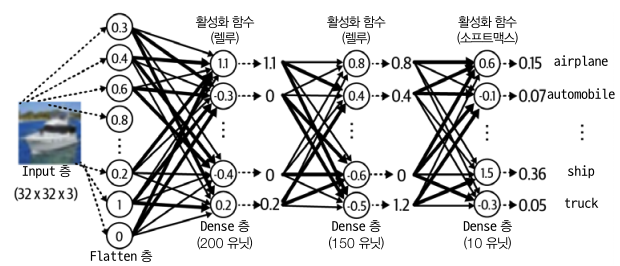
### 층
MLP 생성 시 세 종류(Input, Flatten, Dense)의 층을 사용했다.
Input 층은 네트워크의 시작점으로, 네트워크가 기대하는 입력 데이터 크기를 튜플로 알려주어야 한다. 배치 크기는 지정하지 않았으며 Input 층에 임의의 이미지 개수를 전달할 수 있기 때문에 배치 크기가 필요하지 않음.
다음 Flatten 층은 입력을 하나의 벡터로 펼친다. 결과 벡터의 길이는 3,072(32*32*3). 이렇게 하는 이유는 후의 Dense층이 다차원 배열이 아닌 평평한 입력을 기대하기 때문. 다른 종류의 층은 입력을 다차원 배열으로 사용해야 한다. 언제 Flatten 층을 사용하는지 이해하려면 층마다 필요한 입력과 출력의 크기를 알아야 한다.
Dense층은 기본적 신경망 구성 요소. 이 층에는 이전 층과 완전하게 연결되는 유닛이 있다. 즉, 이 층의 각 유닛은 이전 층의 모든 유닛과 연결된다. 연결마다 하나의(양수 또는 음수) 가중치가 동반된다. 유닛의 출력은 이전 층에서 받은 입력과 가중치를 곱해 더한 것임. 이후 비선형 활성화 함수를 통과해 다음 층으로 전달됨. 활성화 함수는 신경망이 복잡한 함수를 학습하는데 중요한 역할을 한다. 그렇지 않으면 입력을 선형적으로 조합한 값만 출력될 것임.
### 활성화 함수
활성화 함수의 종류가 많다. 대표적은 세 개의 활성화 함수는 렐루, 시그모이드, 소프트맥스.
#### 렐루
 활성화 함수는 입력이 음수이면 0이고, 그 외에는 입력과 동일한 값을 출력한다. 리키렐루 호할성화 함수는 한 가지만 빼고 렐루와 비슷하다. 렐루 활성화 함수는 입력이 0보다 작으면 0을 반환하지만 리키렐루 함수는 입력에 비례하는 작은 음수를 반환한다. 편향이 이미 큰 음수값이라 렐루 함수가 항상 0을 출력한다면 이 유닛은 아무것도 학습할 수 없기 때문. 이 경우 gradient가 0이 되어 어떤 오류도 이 유닛을 통해 전파되지 않는다. 리키렐루 활성화 함수는 gradient가 0이 되지 않도록 해 문제를 해결하기 위해 개발된 함수. 렐루 기반의 함수는 심층 신경망의 층을 안정적으로 훈련할 수 있는 믿을만한 함수 중 하나.
#### 시그모이드
활성화 함수는 층의 출력을 0에서 1사이로 조정하고 싶을 때 유용하다. 예로 출력 유닛이 하나인 이진 분류 문제나 샘플이 하나 이상의 클래스에 속할 수 있는 다중 레이블 분류 문제에서 사용한다. 아래 그림은 렐루, 리키렐루, 시그모이드 함수를 비교한 값.

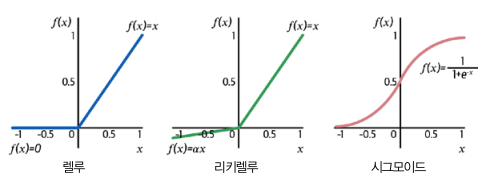
#### 소프트맥스
층의 전체 출력 합이 1이 되어야 할 때 사용. 예제에서 소프트맥스 함수를 사용해 마지막 층의 합이 1인 10개의 확률을 출력했다. 이 값을 이미지가 10개의 클래스에 속할 확률로 이해할 수 있다.

Dense 층의 일부로 정의된 렐루 활성화 함수<br>
x = layers.Flatten()(input_layer)

별도의 층으로 정의된 렐루 활성화 함수<br>
x = layers.Dense(200, activation="relu")(x)<br>
x = layers.Activation('relu')(x)

입력을 두개의 Dense층에 통과시킨다. 첫 층에는 유닛이 200개, 둘째 층에는 150개. 둘 모두 렐루 활성화 함수를 사용한다.

## 3. Train the model <a name="train"></a>

In [10]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

### 손실 함수
손실 함수는 신경망이 예측 출력과 정답을 비교하는데 사용한다. 이 함수는 샘플마다 하나의 수치를 반환한다. 값이 클수록 샘플에 대한 네트워크 수행 결과가 좋지 않음을 의미함.
케라스는 많은 손실 함수를 기본으로 제공하며 나만의 손실 함수를 정의할 수도 있다. 가장 많이 사용하는 세 개의 손실 함수는 평균제곱오차, 범주형 크로스엔트로피, 이진크로스엔트로피가 있다.<br>신경망이 회귀(연속값 예측)문제라면 평균제곱오차 손실을 사용한다. 이 함수는 각 샘플의 정답과 예측값 사이의 차이를 제곱하고 모든 샘플에 대해 평균한 값.<br>
만약 샘플이 여러 클래스 중 하나에 속해야 하는 ㅍ문제라면 범주형 크로스 엔트로피가 알맞다.<br>
출력 유닛이 하나인 이진 분류문제이거나 샘플이 여러 클래스에 속할 수 있는 다중 레이블 분류 문제라면 이진 크로스 엔트로피를 사용한다.

### 옵티마이저
옵티마이저는 손실 함수의 gradient를 기반으로 신경망의 파라미터를 업데이트할 때 사용하는 알고리즘. 널리 사용하고 안정적인 옵티마이저는 Adam이다. 학습률을 제외하면 일반적으로 Adam 옵티마이저의 기본 매개변수를 바꿀 필요가 없다. 학습률이 클수록 한번의 훈련 스텝에서 파라미터를 크게 바꾼다. 학습률이 크면 초기에 훈련 속도가 빠르지만 훈련이 조금 불안정한 단점이 있고 손실 함수의 전역 최소값을 찾지 못할수도 있다. 매개변수는 훈련 과정에서 튜닝하고 조정해야한다.<br>
또 널리 사용하는 옵티마이저는 RMSProp. 이 옵티마이저의 매개변수도 조정할 필요가 없다. 다만 케라스 문서(keras.io/optimizers/)를 참고해 각 매개변수의 역할을 이해해둘 것.

In [11]:
# 모델 훈련
# 아직 모델에 어떤 데이터도 전달하지 않은 상태이다. 네트워크 구조 정의 및 모델 손실함수와 옵티마이저를 연결하자.
# 데이터로 모델을 훈련하려면 아래와 같이 fit 메서드를 호출한다.
model.fit(x_train, # 원본 이미지 데이터
          y_train, # 원-핫 인코딩된 클래스 레이블
          batch_size=32, # 훈련 스텝마다 네트워크에 전달할 샘플의 개수를 결정
          epochs=10, # 네트워크가 전체 훈련 데이터에 대해 반복 훈련 횟수를 정의
          shuffle=True) # True인 경우 훈련 스텝마다 배치를 훈련 데이터에서 중복허용X, 랜덤하게 추출한다.

Epoch 1/10


1563/1563 [==============================] - 4s 2ms/step - loss: 1.8503 - accuracy: 0.3325
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6680 - accuracy: 0.4006
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5980 - accuracy: 0.4302
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5409 - accuracy: 0.4483
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5033 - accuracy: 0.4637
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4671 - accuracy: 0.4788
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4408 - accuracy: 0.4863
Epoch 8/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4180 - accuracy: 0.4945
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3952 - accuracy: 0.5035
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3

훈련 스텝마다 한 이미지 배치가 네트워크를 통과하고 오차가 역전파되어 파라미터를 업데이트한다. batch size는 스텝마다 몇개의 이미지로 배치를 만들지 결정한다. 배치 크기가 클수록 gradient계산은 안정적이지만 훈련 스텝의 속도는 느려진다.<br>
전체 데이터셋을 사용해 훈련 스텝마다 gradient를 계산하는 작업은 시간이 오래 걸리고 리소스가 많이 든다. 일반적으로 32~256 사이의 배치 크기를 사용한다. 최근에는 훈련이 진행됨에 따라 배치 크기를 증가시키는 방식을 권장한다.(arxiv.org/abs/1711.00489) Adam, RMSProp과 같은 옵티마이저는 훈련이 진행됨에 따라 최소값을 찾기 쉽도록 학습률을 줄여나간다. 해당 논문은 학습률을 줄이는 대신 배치 크기를 늘리는 방식으로 훈련 반복횟수를 줄이며 동일한 정확도를 얻을 수 있다고 설명한다. 훈련 과정에서 배치 크기를 조정하려면 fit 메서드 대신 train_on_batch 메서드를 사용하자.

모델 정확도가 51.08%를 달성했다. 하지만 학습에 사용하지 않은 이미지 데이터에서는 성능이 어떤지 알아보자.

## 4. Evaluation <a name="evaluate"></a>

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 891us/step - loss: 1.5141 - accuracy: 0.4682


[1.5141087770462036, 0.4681999981403351]

이전에 본 적 없는 이미지에서도 46%의 정확도를 달성했다. 이 모델이 무작위로 예측하면 약 10%의 정확도를 얻을 것이다.(클래스가 10개이기 때문).
아래에서는 predict 메서드를 사용해 테스트 세트에 대한 예측 결과를 확인해볼 수 있다.

In [15]:
CLASSES = np.array(["airplane", "automobile","bird","cat","deer","dog","frog","horse","ship","truck"])

preds = model.predict(x_test) # preds는 [10000, 10]크기의 배열이다. 즉 샘플마다 10개의 클래스 확률을 담은 벡터가 반환된다.
preds_single = CLASSES[np.argmax(preds, axis=-1)] # 이 확률 배열을 np의 argmax 함수를 사용해 하나의 예측 결과로 바꾼다. 여기서 axis=-1은 마지막 차원(클래스차원)으로 배열을 압축하라는 의미. 따라서 preds_single의 크기는 [10000, 1]이 된다.
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 0s 836us/step


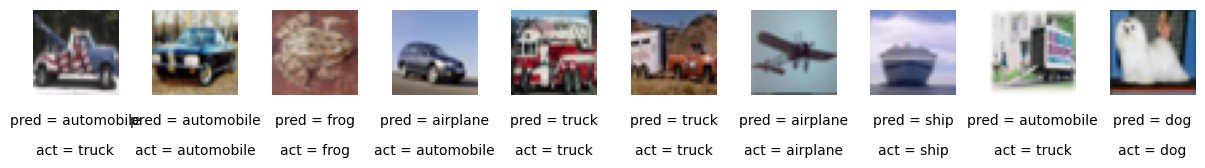

In [16]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

이번 시간에는 다층 퍼셉트론을 만들고 이를 사용해 새로운 데이터에서 예측을 수행했다. 기존 MSAI 팀원들과 팀프로젝트를 진행할 때 시간에 쫓겨 여러 함수에 대해 정확히 이해하지 않은 상태로 논문, GPT등이 적합하다고 해서 적용해보는 등 여러가지 시도를 했었지만 원하는 값을 얻기 힘든 경우도 많았다. 물론 그렇게 많은 시도를 하며 더 좋은 결과값을 찾아낼 수는 있었지만, 궁극적으로 왜 더 좋은 결과를 내는지 정확한 이유를 알 수 없는상태로 끝맺었었다. 이번 시간을 통해 익숙한 함수들을 다시 볼 수 있었고, 이전보다 해당 함수들에 대한 이해도를 높이는 시간을 가질 수 있었다.